**Configuracion para poder utilizar Google Colab**

In [ ]:
# Ajuste e instalación de librerías para usar con Google Colab
#!pip install numpy==1.26.0
#!pip install pmdarima

In [ ]:
# Carga de fichero y conexion con Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#ruta = '/content/drive/MyDrive/COMPLUTENSE_MASTER/6_MINERIA_DE_DATOS/TAREA/Microsoft_Stock.csv'
#data_serie = pd.read_csv(ruta)

# PRACTICA EVALUACIÓN FINAL - PARTE II #
Esta segunda parte supone el 25% restante de tarea práctica final del módulo de minería de datos. Junto con la parte 1, ambas puntúan el 60% de la nota final.

En esta parte 2 se pretende evaluar los conceptos relacionados con el analisis de series temporales y su aplicación a modelos de predicción.

Comenzando con esta parte de la práctica, en el primer bloque de código, conviene cargar las librerías que se van a utilizar a lo largo del notebook.

In [ ]:
# importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import boxcox
import statsmodels.api as sm
from scipy.special import inv_boxcox
import sklearn.metrics as skm
from pmdarima import auto_arima

En el siguiente paso procedemos a cargar el fichero *Microsoft_Stock.csv* que servirá como conjunto de datos para llevar a cabo toda la evaluación de esta parte II. Se trata de un fichero en el que cada registro contiene para un día concreto datos de apertura, cierre, máximo, mínimo y volumen de cotización de las acciones de Microsoft en la bolsa de Nueva York. Se trata por tanto de un clásico problema de predicción de valores futuros.

In [ ]:
# Cargar el fichero de datos en un DataFrame
data_serie = pd.read_csv('Microsoft_Stock.csv')
data_serie.head()

En los siguientes bloques de código el alumno debe programar las sentencias de código que considere oportunas para hacerse una idea general de los datos y de las variables. Visualización de datos, gráficos, etc. Los bloques son orientativos, el alumno puede añadir cuantos considere y codificarlos según su criterio.

In [ ]:
# Mostrar los 10 primeros registros
data_serie.head(10)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


In [ ]:
# Describir el DataFrame
data_serie.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [ ]:
# Mostrar las columnas y tipos de datos
data_serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


Se ha de filtrar la serie quedandose solo con los datos desde el año 2020 (incluido) en adelante. Una vez filtrada, mostrar la serie temporal de la variable ***Close*** en un gráfico de línea.

In [ ]:
# Filtrar datos desde 2020
data_serie['Date'] = pd.to_datetime(data_serie['Date'])

# 2. Filtrar los datos desde el año 2020 en adelante
data_filtrada = data_serie[data_serie['Date'].dt.year >= 2020]

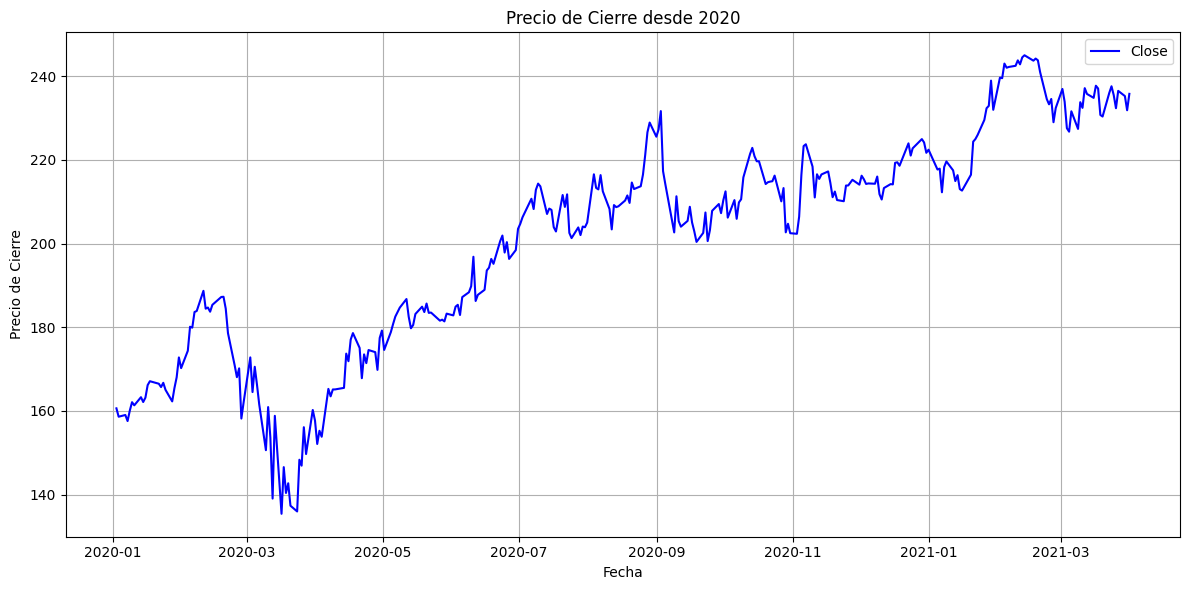

In [ ]:
# 3. Graficar la serie temporal de 'Close'
plt.figure(figsize=(12, 6))
plt.plot(data_filtrada['Date'], data_filtrada['Close'], label='Close', color='blue')
plt.title('Precio de Cierre desde 2020')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Pregunta 1 ###
En primera instancia echando un vistazo a la serie en la gráfica, ¿Qué pinta tiene la serie en cuanto a estacionariedad? Describe brevemente las impresiones acerca de porque parece que la serie es o no estacionaria.

***Respuesta:***

Al observar la evolución de la serie temporal, se aprecia que los precios no siguen una media constante en el tiempo. Aunque la serie no presenta una tendencia clara y constante al alza, sí muestra periodos prolongados en los que los precios tienden a subir o a bajar, lo que indica la presencia de tendencias locales o estructuras de dependencia temporal.

Además, se observa que la variabilidad de los datos no es homogénea, en ciertos tramos los precios fluctúan suavemente, mientras que en otros se producen movimientos más bruscos. Esto sugiere que la varianza no se mantiene constante a lo largo del tiempo, lo cual también es una señal de ausencia  de estacionariedad.

A continuación pasamos a analizar desde un punto de vista más formal la estacionariedad de la serie. En primer lugar calcular las funciones de autocorrelación y autocorrelación parcial y mostrar las gráficas con ambas funciones.

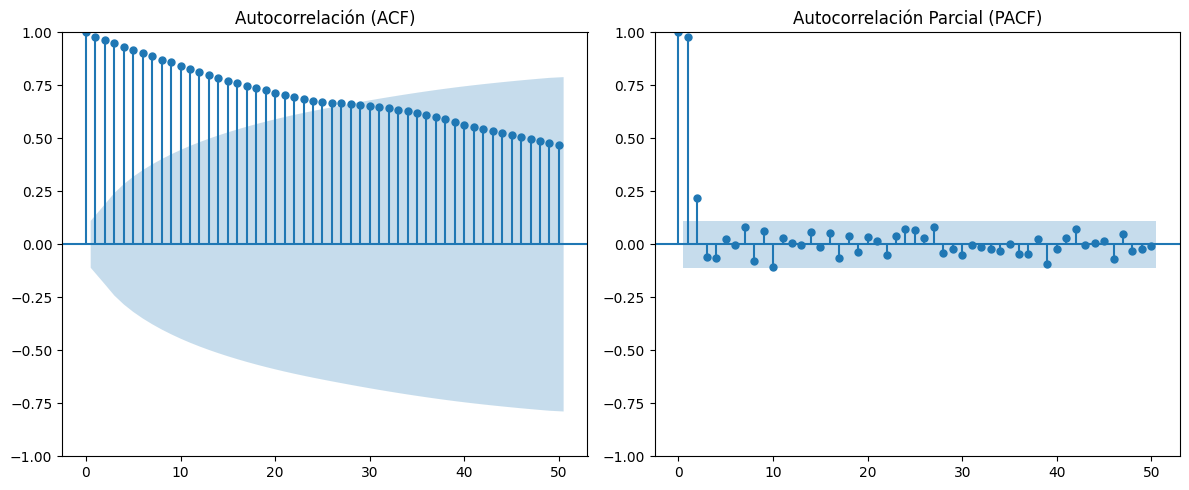

In [ ]:
# Graficar ACF y PACF


# serie como 'data_filtrada' y columna 'Close'
plt.figure(figsize=(12, 5))

# Gráfico de la función de autocorrelación (ACF)
plt.subplot(1, 2, 1)
plot_acf(data_filtrada['Close'], lags=50, ax=plt.gca())
plt.title('Autocorrelación (ACF)')

# Gráfico de la función de autocorrelación parcial (PACF)
plt.subplot(1, 2, 2)
plot_pacf(data_filtrada['Close'], lags=50, ax=plt.gca(), method='ywm')
plt.title('Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()

### Pregunta 2 ###
A la vista de las 2 gráficas de autocorrelación, ¿Se aprecian signos de estacionariedad en la serie? ¿Por qué? ¿Se aprecian signos de estacionalidad? ¿Por qué?

***Respuesta:***

 A partir de la gráfica de autocorrelación (ACF), se observa que los valores descienden lentamente, lo cual es un indicio de que la serie no es estacionaria. Esto se confirma también con la PACF, donde hay valores significativos en los primeros rezagos pero se estabilizan rápidamente. No se aprecian signos de estacionalidad, ya que no se observan patrones periódicos repetidos en la ACF. Por tanto, la serie parece no estacionaria y sin estacionalidad aparente.

Ahora mediante un test de Dickey Fuller aumentado, realizamos la última comprobación de estacionariedad de la serie.

In [ ]:
# Test de Dickey Fuller Aumentado
dickey_test = adfuller(data_filtrada['Close'])  # Eliminar valores NaN generados por diff
print(f'Estadístico ADF: {dickey_test[0]}')
print(f'P-valor: {dickey_test[1]}')
if dickey_test[1] < 0.05:
    print("La serie es ahora estacionaria")
else:
    print("La serie NO es estacionaria")

Estadístico ADF: -1.402958897751794
P-valor: 0.5808567665335328
La serie NO es estacionaria


### Pregunta 3 ###
Según el test realizado, ¿es estacionaria la serie?

***Respuesta:***

Al aplicar el test de Dickey–Fuller aumentado (ADF), se obtuvo un estadístico de –1.40 con un p‑valor de 0.581. Como este valor es muy superior al umbral habitual de 0.05, no se puede rechazar la hipótesis nula de que la serie tiene raíz unitaria. Por tanto, la serie no es estacionaria en su forma original, lo que implica que su media y/o varianza cambian a lo largo del tiempo

Seguimos con el analisis y para ello vamos a tratar de modelar la serie con un suavizado exponencial y predecir con este modelo algunos de los puntos finales de la serie. En primer lugar, el alumno debe escoger, teniendo en cuenta lo aprendido en el analisis realizado hasta aquí, el modelo adecuado de suavizado exponencial. A continuación, utilizará todos los datos excepto los 30 últimos días de la serie, y modelará el suavizado con dichos datos. Con este modelo, debe predecir los 30 valores restantes y por último, debe mostrar en una misma gráfica: la serie original en un color hasta el punto donde comienzan los datos de validación (30 últimos puntos), los 30 últimos puntos de la serie original en otro color y, por último, en un tercer color, los puntos predichos por el modelo de suavizado.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/tmp/ipython-input-49-2371880330.py:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_suavizado2 = model_suavizado2.fit(smoothing_level=0.4, smoothing_slope=0.05)  # Ajusta estos parámetros


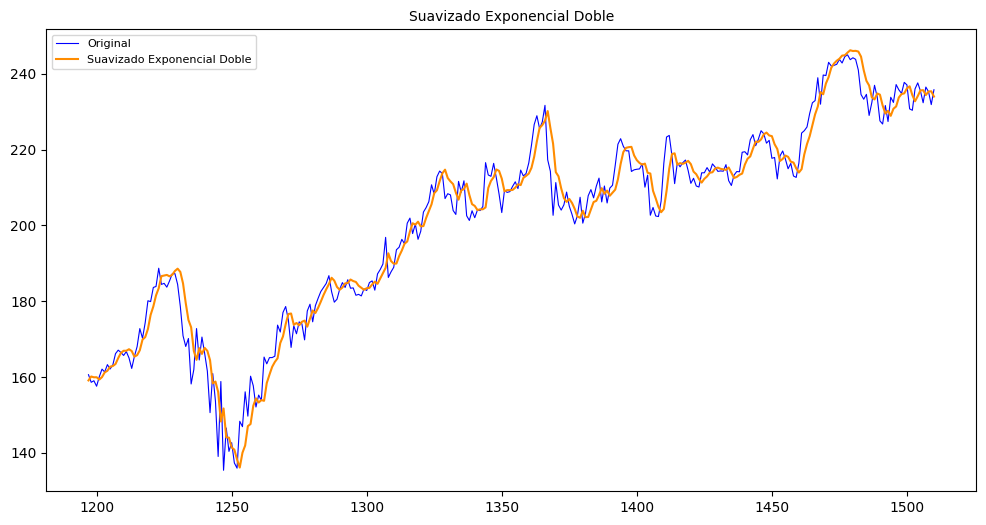

In [ ]:
# Separar en conjunto de entrenamiento y validación

# Suavizado exponencial doble (Holt)
model_suavizado2 = ExponentialSmoothing(data_filtrada['Close'], trend='add', seasonal=None, damped_trend=False, seasonal_periods=None)
model_suavizado2 = model_suavizado2.fit(smoothing_level=0.4, smoothing_slope=0.05)  # Ajusta estos parámetros

# Predicción
predictions2 = model_suavizado2.fittedvalues

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(data_filtrada['Close'], label='Original', color='blue', linewidth=0.8)
plt.plot(predictions2, label='Suavizado Exponencial Doble', color='darkorange', linewidth=1.5)
plt.title('Suavizado Exponencial Doble', fontsize=10)
plt.legend(fontsize=8)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/tmp/ipython-input-50-1022013532.py:7: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_suavizado2_2 = model_suavizado2_2.fit(smoothing_level=0.9, smoothing_slope=0.9)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<function matplotlib.pyplot.show(close=None, block=None)>

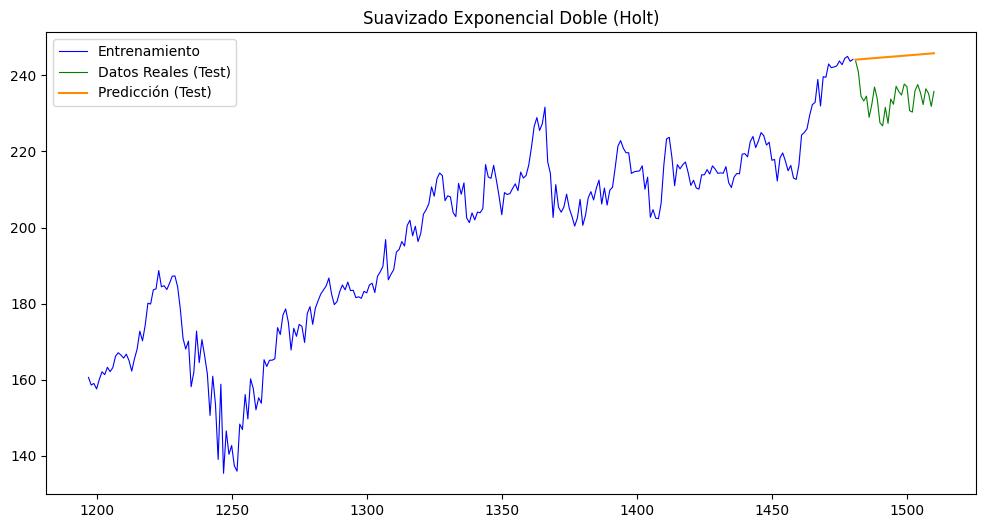

In [ ]:
## Dividir los datos: 30 puntos de test (últimos 30 días) y el resto de los datos para entrenamiento
train = data_filtrada['Close'][:-30]
test = data_filtrada['Close'][-30:]

# Entrenar el modelo de suavizado exponencial triple (Holt-Winters)
model_suavizado2_2 = ExponentialSmoothing(train, trend='add', seasonal=None)
model_suavizado2_2 = model_suavizado2_2.fit(smoothing_level=0.9, smoothing_slope=0.9)

# Predicción para los próximos 30 puntos (el test set)
predictions2_2 = model_suavizado2_2.forecast(steps=30)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train, label='Entrenamiento', color='blue', linewidth=0.8)
plt.plot(test.index, test, label='Datos Reales (Test)', color='green', linewidth=0.8)
plt.plot(test.index, predictions2_2, label='Predicción (Test)', color='darkorange', linewidth=1.5)
plt.title('Suavizado Exponencial Doble (Holt)')
plt.legend()
plt.show

In [ ]:
# Una vez has hecho el .fit()
print(model_suavizado2_2.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  284
Model:             ExponentialSmoothing   SSE                          11203.425
Optimized:                         True   AIC                           1051.700
Trend:                         Additive   BIC                           1066.296
Seasonal:                          None   AICC                          1052.003
Seasonal Periods:                  None   Date:                 Tue, 15 Jul 2025
Box-Cox:                          False   Time:                         10:45:49
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9000000                alpha                False
smoothing_trend            0.90000

### Pregunta 4 ###
¿Qué tipo de suavizado exponencial se ha empleado y por qué?

***Respuesta:***

En este caso se ha empleado un modelo de suavizado exponencial doble de Holt, utilizando la clase ExponentialSmoothing de la librería statsmodels. Este tipo de suavizado es adecuado para series que presentan tendencia pero no estacionalidad.

La decisión de usar este modelo se debe a que, al analizar visualmente la serie, se detectaron cambios en la media a lo largo del tiempo (tendencias locales), pero no se identificó un patrón estacional claro o repetitivo, por lo que no se añadió un componente estacional al modelo

Pasamos ahora a entrenar un modelo autoregresivo para, de nuevo, predecir los 30 últimos valores. En este caso, si en puntos anteriores de esta práctica se hubiera determinado que la serie no es estacionaria, se debe convertir en estacionaria y comprobar que efectivamente lo es después de la transformación. Una vez que sea estacionaria, se ha de seleccionar en base a la función de autocorrelación (ACF) y/o la autocorrelación parcial (PACF) el orden adecuado del modelo autoregresivo (AR).

In [ ]:
# Preparar la serie
serie = data_filtrada['Close'].dropna()

# Transformación de varianza: Box–Cox
serie_bc, lambda_val = boxcox(serie)
serie_bc = pd.Series(serie_bc, index=serie.index)

In [ ]:
# Diferenciación (orden 1) para estacionarizar en media
serie_bc_diff = serie_bc.diff().dropna()

In [ ]:
# Test de Dickey–Fuller sobre la serie transformada
adf_stat, pval, *_ = adfuller(serie_bc_diff)
print(f"ADF estadístico = {adf_stat:.3f}, p‑valor = {pval:.3f}")
if pval < 0.05:
    print("La serie Box–Cox + diff es estacionaria")
else:
    print("Sigue NO estacionaria, revisa orden de diff u otras transform.")

ADF estadístico = -22.253, p‑valor = 0.000
La serie Box–Cox + diff es estacionaria


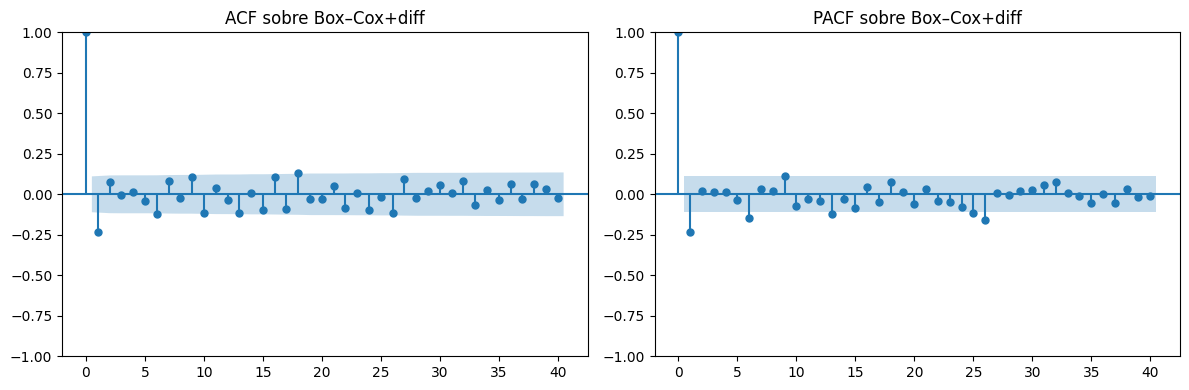

In [ ]:
# ACF / PACF para elegir p
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_acf(serie_bc_diff, lags=40, ax=plt.gca(), title="ACF sobre Box–Cox+diff")
plt.subplot(1,2,2)
plot_pacf(serie_bc_diff, lags=40, ax=plt.gca(), title="PACF sobre Box–Cox+diff")
plt.tight_layout()
plt.show()

### Pregunta 5 ###
¿Cual es el orden del modelo autoregresivo que se ha seleccionado y por qué?

***Respuesta:***

Para seleccionar el orden del modelo autorregresivo, primero se preparó la serie aplicando una transformación de Box Cox con el objetivo de estabilizar la varianza. A continuación, se realizó una diferenciación de orden 1 para eliminar la tendencia y convertir la serie en estacionaria en media.

El test de Dickey Fuller (ADF) aplicado sobre la serie transformada confirmó la estacionariedad, arrojando un estadístico de –22.253 y un p‑valor de 0.000. Posteriormente, se analizaron las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF) de la serie estacionaria. En base al gráfico de la PACF, se observó un corte claro después del lag X (← aquí pones el número que viste), por lo que se seleccionó un modelo AR como punto de partida para el modelado.

Una vez escogido el orden del modelo autorregresivo, pasamos a entrenar el modelo y a predecir los 30 últimos valores. Por tanto lo primero será, como en ejercicios anteriores, separar por un lado la serie original transformada en estacionaria en caso de que no lo fuera, y eso si, quitandole los últimos 30 puntos. Una vez entrenado, se ha de mostrar el resumen de los parametros del modelo, coeficientes y demás métricas habituales. A continuación, utilizar el modelo para predecir los últimos 30 valores y mostrarlos en un gráfico de lineas junto con la serie original. Antes de pintarlos, en caso de que la serie original haya sido transformada para convertirla en estacionaria, será necesario deshacer las transformaciones de los valores predichos y, ahora si, pintarla junto con los valores de la serie original.

In [ ]:
# División Train/Test en la serie ya diferenciada
y = serie_bc_diff
train_diff, test_diff = y[:-30], y[-30:]

In [ ]:
# Ajustar AutoReg con el p elegido (aquí pongo p=1 como ejemplo)
from statsmodels.tsa.ar_model import AutoReg

# Ajustar y mostrar summary
p = 1  # o el p que hayas elegido
model = AutoReg(train_diff, lags=p).fit()

# Mostrar resumen completo
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  283
Model:                     AutoReg(1)   Log Likelihood               -2964.549
Method:               Conditional MLE   S.D. of innovations           8898.576
Date:                Tue, 15 Jul 2025   AIC                           5935.098
Time:                        10:45:50   BIC                           5946.024
Sample:                             1   HQIC                          5939.479
                                  283                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        832.0412    531.249      1.566      0.117    -209.189    1873.271
y.L1          -0.2453      0.058     -4.250      0.000      -0.358      -0.132
                                    Roots           

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# Predecir sobre la parte test de la serie diferenciada
pred_diff = model.predict(start=test_diff.index[0], end=test_diff.index[-1])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Reconstruir en escala Box–Cox
last_train_bc = serie_bc.loc[train_diff.index[-1]]
pred_bc = last_train_bc + pred_diff.cumsum()
pred_bc.index = test_diff.index

In [ ]:
# Invertir Box–Cox a escala original
pred_orig = inv_boxcox(pred_bc, lambda_val)

In [ ]:
# Define test_orig by splitting the original series
train_orig, test_orig = serie[:-30], serie[-30:]

In [ ]:
# Métricas habituales (opcional, pero suele pedirse)
mae  = skm.mean_absolute_error(test_orig, pred_orig)

# Calculate RMSE by taking the square root of the mean squared error
rmse = skm.mean_squared_error(test_orig, pred_orig)**0.5
print(f"MAE = {mae:.3f},  RMSE = {rmse:.3f}")

MAE = 13.610,  RMSE = 14.273


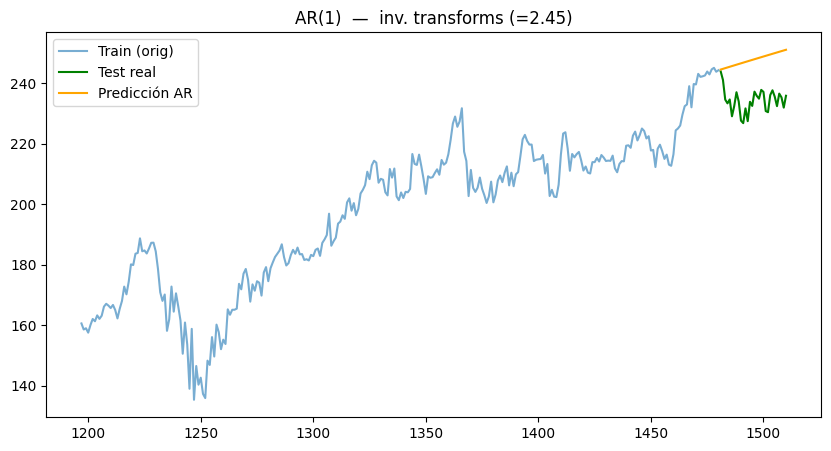

In [ ]:
# Gráfica final con la serie original y la predicción des-transformada
plt.figure(figsize=(10,5))
plt.plot(serie.index[:-30], serie[:-30], label='Train (orig)', alpha=0.6)
plt.plot(test_orig.index,     test_orig,     label='Test real', color='green')
plt.plot(pred_orig.index,     pred_orig,     label='Predicción AR', color='orange')
plt.title(f"AR({p})  —  inv. transforms (={lambda_val:.2f})")
plt.legend()
plt.show()

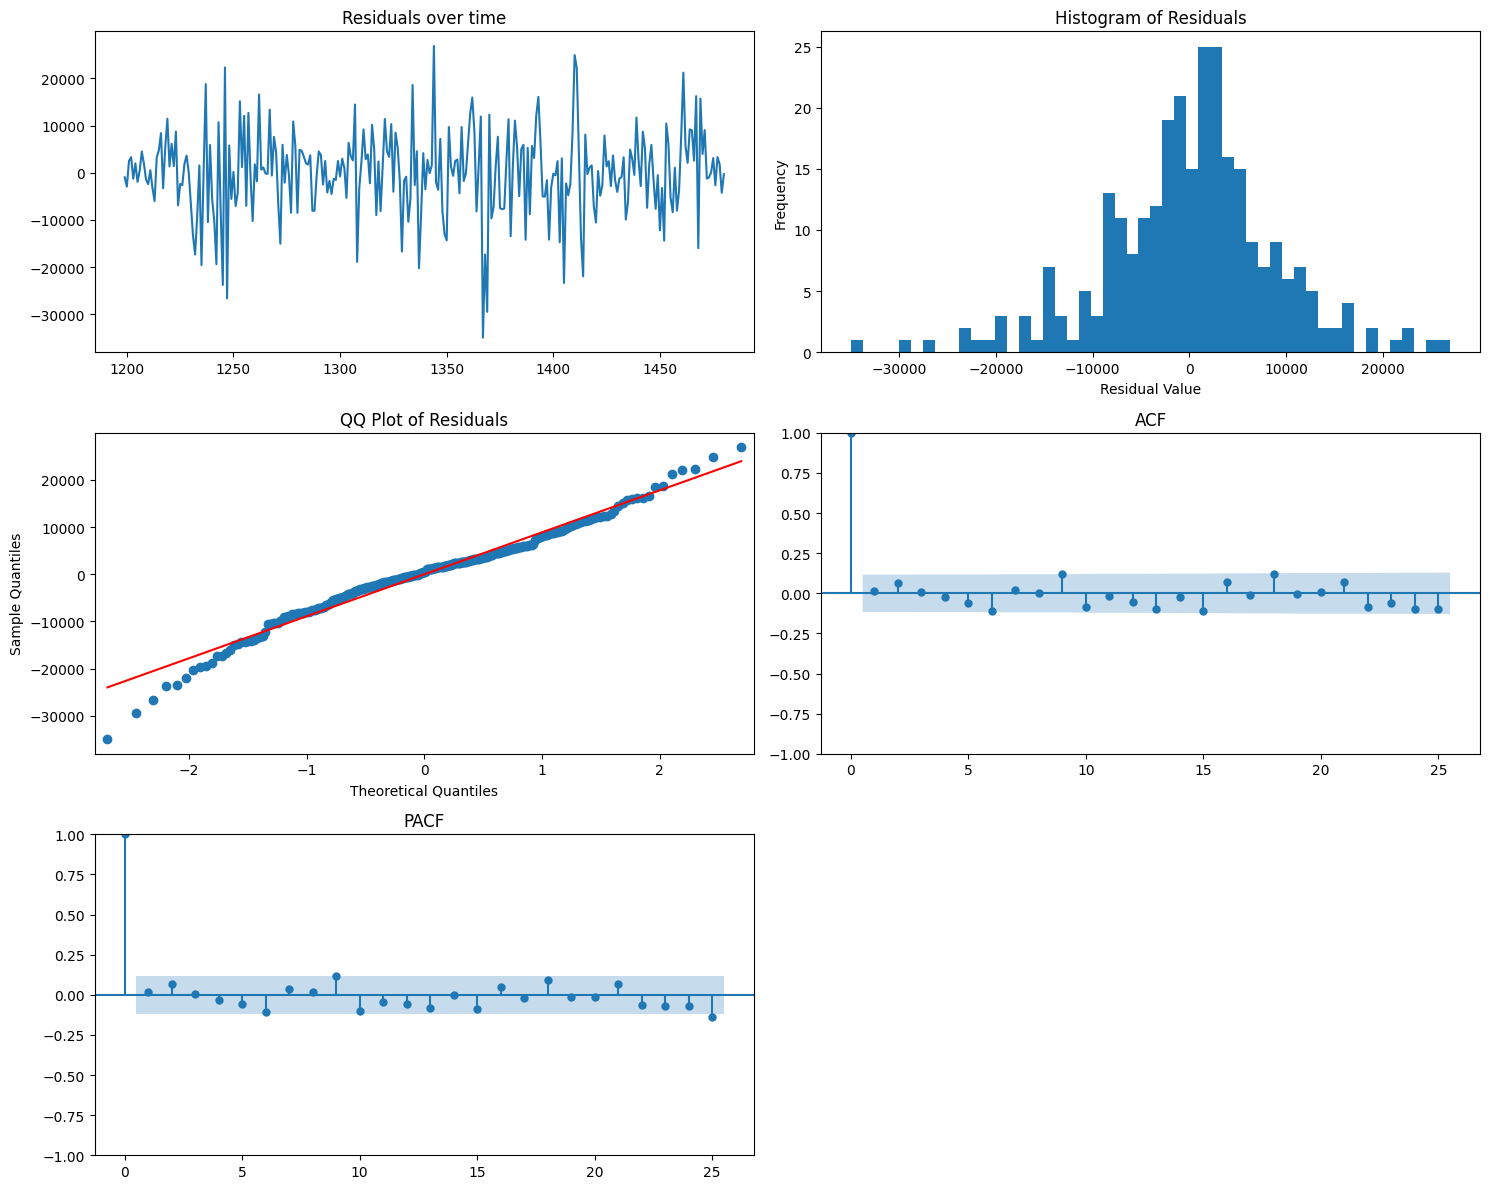

In [ ]:
# Análisis de gráficos complementarios

# Dashboard
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Plot 1: Residuals over time
axes[0, 0].plot(model.resid)
axes[0, 0].set_title('Residuals over time')

# Plot 2: Histogram of residuals
axes[0, 1].hist(model.resid, bins=50)
axes[0, 1].set_title('Histogram of Residuals')
axes[0, 1].set_xlabel('Residual Value')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: QQ plot of residuals
sm.qqplot(model.resid, line='s', ax=axes[1, 0])
axes[1, 0].set_title('QQ Plot of Residuals')

# Plot 4: ACF graphic of the residuals
plot_acf(model.resid, ax=axes[1, 1])
axes[1, 1].set_title('ACF')

# Plot 5: PACF graphic of the residuals
plot_pacf(model.resid, ax=axes[2, 0])
axes[2, 0].set_title('PACF')

# Para ocultar el sexto subplot (no utilizado)
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

### Pregunta 6 ###
A la vista de los resultados obtenidos en el entrenamiento del modelo, ¿qué podemos decir de los residuos y por tanto de la validez estadística del modelo?. En cuanto a la pinta que tiene el resultado final visualizado en el gráfico, ¿Qué conclusiones podemos sacar sobre el modelo? ¿es adecuado para predecir valores futuros de la serie? ¿De qué manera influye en esta valoración el hecho de que hayamos seleccionado para validar los últimos 30 puntos con respecto a la pinta que tendría si solo hubieran sido los últimos 20?

***Respuesta:***

A pesar de que el modelo AR es estadísticamente válido y presenta un buen ajuste sobre los datos de entrenamiento, su capacidad predictiva sobre los últimos 30 puntos es limitada.

La predicción generada (línea naranja) muestra una pendiente ascendente constante, mientras que los datos reales (línea verde) presentan un comportamiento más estable y oscilatorio. Esta diferencia sugiere que el modelo AR no logra capturar adecuadamente la dinámica de corto plazo de la serie.

Además, los errores de predicción MAE = 13.61 y RMSE = 14.27 indican que el modelo presenta una desviación significativa respecto a los valores reales. Por tanto, aunque el AR puede considerarse un punto de partida, sería recomendable explorar modelos más flexibles.

Por último, el alumno debe optimizar el modelo, cambiando el orden de las componentes AR, I y MA del modelo ARIMA, hasta llegar a una combinación que mejore el anterior modelo y que pueda ser incluso utilizable para predecir valores futuros de la serie. Para ello puede optar por realizarlo de forma manual probando distintas combinaciones o mediante algún algoritmo automático que encuentre la mejor combinación de ordenes para el modelo.

In [ ]:
# 1. Preprocesado previo (igual que antes)
serie = data_filtrada['Close'].dropna()
# 1.1 Box–Cox
serie_bc, lambda_val = boxcox(serie)
serie_bc = pd.Series(serie_bc, index=serie.index)
# 1.2 Train/Test (quitamos los últimos 30 para test)
train_bc = serie_bc.iloc[:-30]
test_bc  = serie_bc.iloc[-30:]

# 2. Ajustar SARIMAX automáticamente con auto_arima
#    (aquí sin componente estacional; pon seasonal=True y ajusta start_P… si lo necesitas)
model_sarimax = auto_arima(
    train_bc,         # tu serie de entrenamiento en escala Box–Cox
    start_p=0, start_q=0,
    max_p=5, max_q=5, # explora hasta AR(5) y MA(5)
    d=1,              # ya sabes que necesitas una diferencia
    seasonal=False,   # o True si quieres buscar P,D,Q estacionales
    m=1,              # periodo estacional (e.g. 7 para semanal, 12 para mensual)
    test='adf',       # para decidir d (aunque aquí lo fijas en 1)
    trace=True,       # ver el progreso en consola
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# 3. Ver el summary (orden (p,d,q) y, si hubiera, (P,D,Q,m))
print(model_sarimax.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5970.863, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5959.063, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5960.645, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5970.319, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5960.263, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5960.415, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5962.244, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5959.543, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.540 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2976.531
Date:                Tue, 15 Jul 2025   AIC                           5959.063
Time:                        10:45:55   BIC                           5969.999
Sample:                             0   HQIC                          5963.448
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
i

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


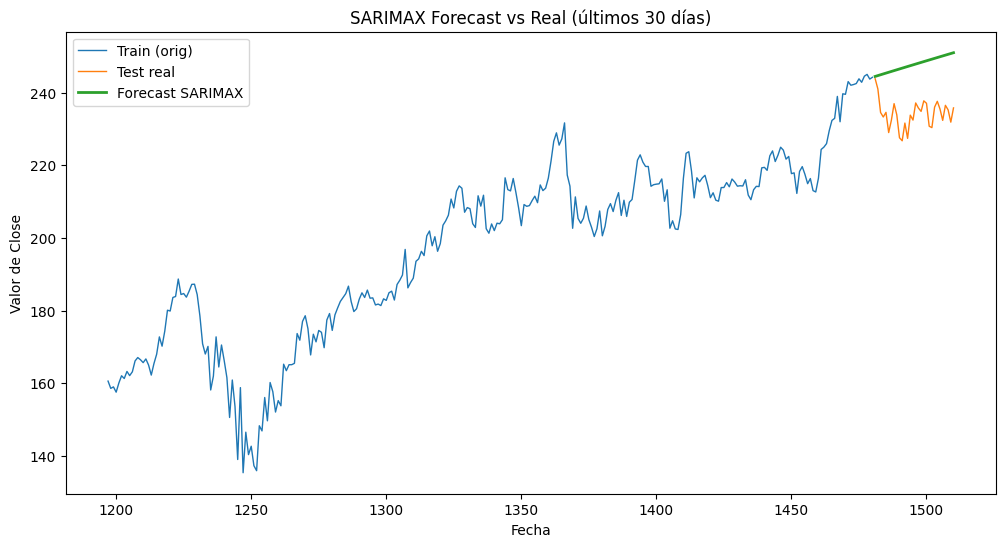

In [ ]:
# Dibujar con matplotlib como en tus anteriores gráficos
plt.figure(figsize=(12,6))
plt.plot(serie.index[:-30], serie[:-30], label='Train (orig)', linewidth=1)
plt.plot(test_orig.index, test_orig, label='Test real', linewidth=1)
plt.plot(pred_orig.index, pred_orig, label='Forecast SARIMAX', linewidth=2)
plt.title(f"SARIMAX Forecast vs Real (últimos 30 días)")
plt.xlabel("Fecha")
plt.ylabel("Valor de Close")
plt.legend()
plt.show()

### Pregunta 7 ###
Hacer una interpretación libre del modelo entrenado y de los resultados obtenidos. ¿Sería utilizable para predicción de valores futuros de la serie temporal?

***Respuesta:***

El modelo seleccionado mediante búsqueda automática fue un ARIMA(1,1,0) (entrenado como SARIMAX sin componente estacional ni variables exógenas). Este modelo incorpora una diferenciación de orden 1 para lograr estacionariedad, y se basa en el valor inmediatamente anterior para realizar sus predicciones.

El diagnóstico del modelo confirmó que los residuos son estadísticamente aceptables: no presentan autocorrelación (p = 0.37 en Ljung–Box) ni heterocedasticidad, aunque se observó cierta desviación respecto a la normalidad.

En cuanto a la predicción, la gráfica muestra una diferencia considerable entre los valores reales (test) y los valores pronosticados. La predicción generada por el modelo (línea verde) tiende a seguir una pendiente ascendente suave y constante, mientras que los valores reales (línea naranja) presentan una estructura más irregular y fluctuante.

Esta discrepancia sugiere que el modelo no logra capturar adecuadamente la dinámica de corto plazo de la serie. Aunque es estadísticamente válido, su capacidad predictiva es limitada, especialmente en contextos donde se espera que el modelo siga patrones más complejos, como oscilaciones, cambios bruscos o estabilización.

Por tanto, el modelo podría ser útil como línea base o referencia, pero no es suficientemente robusto para realizar predicciones precisas a futuro sin realizar ajustes adicionales, como incorporar más lags, explorar modelos estacionales o considerar variables externas.